In [53]:
import numpy as np
from scipy import stats
import seaborn as sns
import math
import pandas as pd
from sklearn.naive_bayes import GaussianNB

# Probabilities

## Normal distribution

In [2]:
data = np.array([126. , 129.5, 133. , 133. , 136.5, 136.5, 140. , 140. , 140. ,
                  140. , 143.5, 143.5, 143.5, 143.5, 143.5, 143.5, 147. , 147. ,
                  147. , 147. , 147. , 147. , 147. , 150.5, 150.5, 150.5, 150.5,
                  150.5, 150.5, 150.5, 150.5, 154. , 154. , 154. , 154. , 154. ,
                  154. , 154. , 154. , 154. , 157.5, 157.5, 157.5, 157.5, 157.5,
                  157.5, 157.5, 157.5, 157.5, 157.5, 161. , 161. , 161. , 161. ,
                  161. , 161. , 161. , 161. , 161. , 161. , 164.5, 164.5, 164.5,
                  164.5, 164.5, 164.5, 164.5, 164.5, 164.5, 168. , 168. , 168. ,
                  168. , 168. , 168. , 168. , 168. , 171.5, 171.5, 171.5, 171.5,
                  171.5, 171.5, 171.5, 175. , 175. , 175. , 175. , 175. , 175. ,
                  178.5, 178.5, 178.5, 178.5, 182. , 182. , 185.5, 185.5, 189., 192.5])

<AxesSubplot: ylabel='Count'>

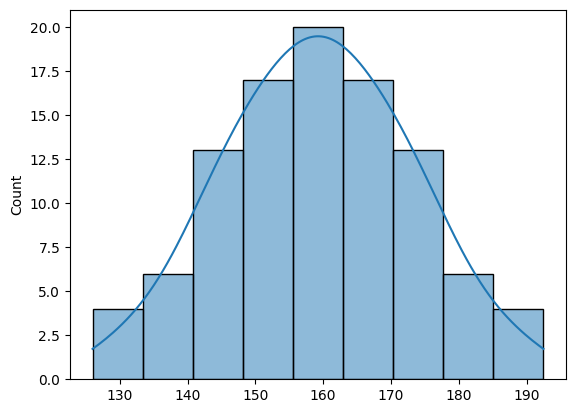

In [3]:
sns.histplot(data, kde=True)

In [4]:
mean = np.mean(data)
std = np.std(data)

mean, std

(159.25, 13.65)

In [5]:
q1 = np.quantile(data, q=0.25)
q2 = np.quantile(data, q=0.5)
q3 = np.quantile(data, q=0.75)

q1, q2, q3

(150.5, 159.25, 168.0)

$ Z_{score} = \frac{x - mean}{\sigma} $

In [6]:
def z_score(x, data):
    mean = np.mean(data)
    std = np.std(data)

    return (x - mean) / std

Probabilitie to get data in q1 quantile

It needs to check the z score table to get the probabilitie from the z_score output value

In [7]:
z_score(q1, data), 0.26109 #Z score table = 0.26109

(-0.641025641025641, 0.26109)

In [8]:
stats.norm.cdf(q1, mean, std)

0.26075301195608336

Probabilitie to get data in q3 quantile

In [9]:
z_score(q3, data), 1 - 0.73 # Z score table accumulative probabilitie = 0.73


(0.641025641025641, 0.27)

In [10]:
1 - stats.norm.cdf(q3, mean, std)

0.26075301195608336

OR

In [11]:
stats.norm.sf(q3, mean, std)

0.26075301195608336

Probabilitie to get data between q2 and q3

In [12]:
stats.norm.cdf(q2, mean, std)

0.5

In [13]:
stats.norm.cdf(q3, mean, std)

0.7392469880439166

In [14]:
stats.norm.cdf(q3, mean, std) - stats.norm.cdf(q2, mean, std)

0.23924698804391664

Probabilitie to get data in q1 or q3

In [15]:
stats.norm.cdf(q1, mean, std) + stats.norm.sf(q3, mean, std)

0.5215060239121667

Probabilitie to not get data in q1 or q3

In [16]:
1 - (stats.norm.cdf(q1, mean, std) + stats.norm.sf(q3, mean, std))

0.4784939760878333

### Exercice

- mean = 24
- std = 8
- x = 40

In [17]:
x = (40 - 24) / 8
x, 97725, stats.norm.cdf(x) #checked in the z score table | cdf gets the value from z table

(2.0, 97725, 0.9772498680518208)

or

In [18]:
stats.norm.cdf(40, 24, 8)

0.9772498680518208

- mean = 38000
- std = 3000
- x1 = 35000
- x2 = 44000 - survive function

In [19]:
x = (35000 - 38000) / 3000
x, 1 - stats.norm.cdf(x)

(-1.0, 0.8413447460685429)

or

In [20]:
stats.norm.sf(35000, 38000, 3000)

0.8413447460685429

In [21]:
x = (44000 - 38000) / 3000
x, 1 - stats.norm.cdf(x), stats.norm.sf(x)

(2.0, 0.02275013194817921, 0.022750131948179195)

or

In [22]:
stats.norm.sf(44000, 38000, 3000)

0.022750131948179195

## Binomial distribution

$ P(X=x) = \frac{n!}{(n - x)!x!} * p^{x}(1 - p)^{n - x} $

In [24]:
def binomial(x, n, p):
    return (math.factorial(n) / (math.factorial(n - x) * math.factorial(x))) * math.pow(p, x) * math.pow(1 - p, n -x)

Coin exemple

- Tossing a coin 10 times, which the probabilitie to get 5 heads?

In [23]:
n = 10 #trials
x = 5 #condition - 5 heads
p = 0.5 #probabilitie

In [25]:
binomial(x, n, p)

0.24609375

using scipy library

In [26]:
stats.binom.pmf(x, n, p)

0.24609375000000003

### Exercice

In [27]:
x = 7
n = 10
p = 0.7

In [28]:
binomial(x, n, p)

0.266827932

In [29]:
stats.binom.pmf(x, n, p)

0.26682793200000005

In [33]:
x = 1
n = 50
p = 0.05

In [34]:
binomial(x, n, p)

0.202486777043982

In [35]:
stats.binom.pmf(x, n, p)

0.2024867770439825

In [36]:
x = 0
binomial(x, n, p)

0.07694497527671315

In [37]:
stats.binom.pmf(x, n, p)

0.07694497527671315

## Poisson distribution

$ P(X = x) = e^{- \lambda} \frac{\lambda^{x}}{x!} $

In [39]:
def poisson(x, mean):
    return math.pow(math.e, -mean) * (math.pow(mean, x) / math.factorial(x))

In [40]:
x = 14
mean = 10

In [41]:
poisson(x, mean)

0.05207710444602621

In [42]:
stats.poisson.pmf(x, mean)

0.05207710444602615

### Exercice

In [43]:
x = 1
mean = 0.05

In [44]:
poisson(x, mean)

0.047561471225035706

In [45]:
stats.poisson.pmf(x, mean)

0.04756147122503571

In [46]:
x = 0
poisson(x, mean), stats.poisson.pmf(x, mean)

(0.951229424500714, 0.951229424500714)

In [47]:
x = 5
mean = 50

In [52]:
poisson(x, mean), stats.poisson.pmf(x, mean)

(5.022786062406049e-16, 5.02278606240605e-16)

## Using probabilities in ML

In [59]:
df = pd.read_csv('../Bases de dados/credit_data.csv')
df.dropna(inplace=True)
df.head()

,i#clientid,income,age,loan,c#default
0,1,66155.925095,59.017015,8106.532131,0
1,2,34415.153966,48.117153,6564.745018,0
2,3,57317.170063,63.108049,8020.953296,0
3,4,42709.534201,45.751972,6103.642260,0
4,5,66952.688845,18.584336,8770.099235,1


In [60]:
X = df.iloc[:, 1:4].values
X.shape

(1997, 3)

In [61]:
y = df.iloc[:, 4].values
y.shape

(1997,)

In [62]:
nb = GaussianNB()
nb.fit(X, y)

GaussianNB()

Predicting a random value

In [64]:
X[10], X[10].shape

(array([6.41314154e+04, 2.56795754e+01, 4.35102897e+03]), (3,))

In [66]:
input_x = X[10].reshape(1, -1)
input_x, input_x.shape

(array([[6.41314154e+04, 2.56795754e+01, 4.35102897e+03]]), (1, 3))

In [67]:
prev = nb.predict_proba(input_x)
prev

array([[0.60618299, 0.39381701]])

In [68]:
np.argmax(prev)

0

In [69]:
nb.predict(input_x)

array([0])